<table align="left" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="Purple" size=6.5px>
                  <b> Gene Classification from DNA Sequence</b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Introduction: 

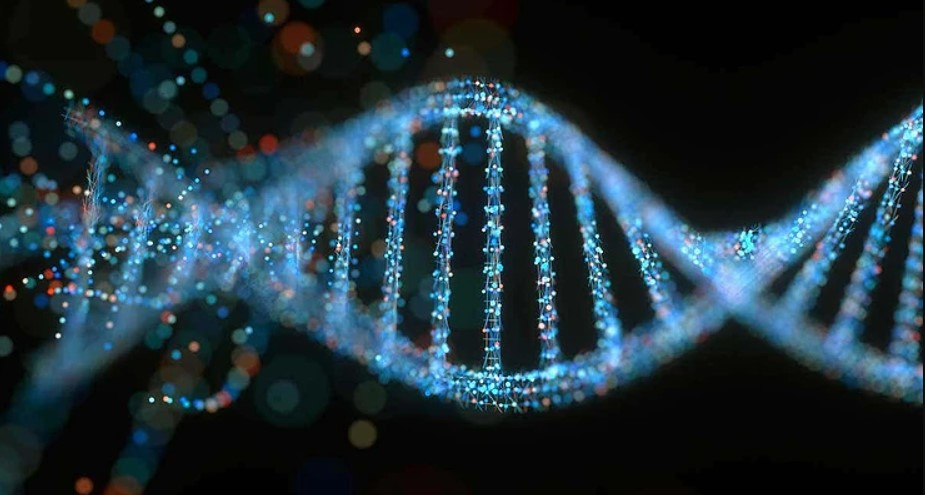

In [68]:
from IPython.display import Image
Image("DNA.jpg")

A genome is a complete collection of DNA in an organism. All living species possess a genome, but they differ considerably in size. The human genome, for instance, is arranged into 23 chromosomes, which is a little bit like an encyclopedia being organized into 23 volumes. And if you counted all the characters (individual DNA “base pairs”), there would be more than 6 billion in each human genome. So it’s a huge compilation.

A human genome has about 6 billion characters or letters. If you think the genome(the complete DNA sequence) is like a book, it is a book about 6 billion letters of “A”, “C”, “G” and “T”. Now, everyone has a unique genome. Nevertheless, scientists find most parts of the human genomes are alike to each other.

As a data-driven science, genomics extensively utilizes machine learning to capture dependencies in data and infer new biological hypotheses. Nonetheless, the ability to extract new insights from the exponentially increasing volume of genomics data requires more powerful machine learning models. By efficiently leveraging large data sets, deep learning has reconstructed fields such as computer vision and natural language processing. It has become the method of preference for many genomics modeling tasks, including predicting the influence of genetic variation on gene regulatory mechanisms such as DNA receptiveness and splicing.

So in this article, we will understand how to interpret a DNA structure and how machine learning algorithms can be used to build a prediction model on DNA sequence data.

### How is a DNA Sequence represented?

The diagram shows a tiny bit of a DNA double helix structure.

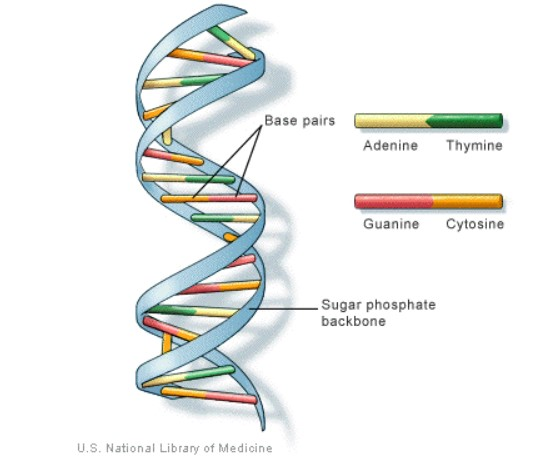

In [69]:
from IPython.display import Image
Image("DNA helix.jpg")

The double-helix is the correct chemical representation of DNA. But DNA is special. It’s a nucleotide made of four types of nitrogen bases: Adenine (A), Thymine (T), Guanine (G), and Cytosine. We always call them A, C, Gand T.

These four chemicals link together via hydrogen bonds in any possible order making a chain, and this gives one thread of the DNA double-helix. And the second thread of the double-helix balance the first. So if you have A on the first thread, you have to have T on the second.

Furthermore, C and G always balance each other. So once you identify one thread of the helix, you can always spell the other.

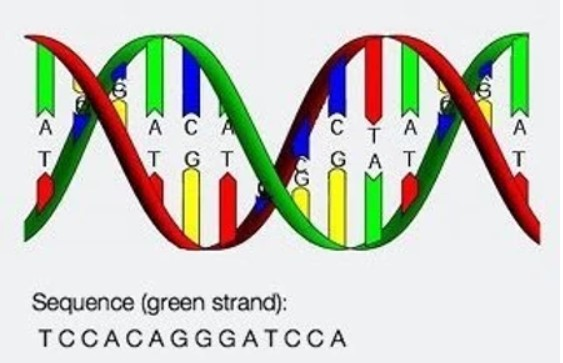

In [70]:
from IPython.display import Image
Image("Seq.jpg")

The order, or sequence, of these bases, determines what biological instructions are contained in a strand of DNA. For example, the sequence ATCGTT might instruct for blue eyes, while ATCGCT might instruct for brown.

In [1]:
# importing libraries 
import numpy as np
import re
import pandas as pd 
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Hands on of learned concept on a small string

In [2]:
# Here we are loading a sample dataset that was available on kaggle. This datset was in fasta format 
# which is is a text-based format for representing either nucleotide sequences or 
# amino acid (protein) sequences basically DNA in layman terms 

from Bio import SeqIO
for sequence in SeqIO.parse('example_dna.fa', "fasta"):
    print('Sequence Id: ',sequence.id) # getting id of sequence 
    print('Sequence pattern : ',sequence.seq) # printing sequence 
    print('Length of sequence: ',len(sequence)) # printing the length of sequence 
    print()

Sequence Id:  ENST00000435737.5
Sequence pattern :  ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGAAGTCCTGGGGCTGACTCTCATTGTCTGGATTGACTGA
Length of sequence:  390

Sequence Id:  ENST00000419127.5
Sequence pattern :  ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGACAAAGGCTGCTCTCAGTACTTCTATGCAGAGCATCTGTCTCTCCACTACCCGCTGGAGATTTCTGCAGCCTCAGGGAGGCTGATGTGTCACTTCAAGCTGGTGGCCATAGTGGGCTACCTGATTCG

In [3]:
# Using the re module that is the regular expressions which allows us to
# quickly check whether a given string matches a given pattern 
def string_to_array(seq_string):
   seq_string = seq_string.lower()
   seq_string = re.sub('[^atgc]', 'n', seq_string)
    # Converting the obtained string into array 
   seq_string = np.array(list(seq_string))
   return seq_string

In [4]:
string_to_array('yytgca')

array(['n', 'n', 't', 'g', 'c', 'a'], dtype='<U1')

#### LabelEncoder 

In [5]:
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','t','g','c','z'])) # labeling atgc as atgc and anything else as z

LabelEncoder()

####  Ordinal encoding

In [6]:
# function to encode a DNA sequence string as an ordinal vector. 
# It returns a NumPy array with A=0.25, C=0.50, G=0.75, T=1.00, n=0.00.
def ordinal_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array)
    float_encoded = integer_encoded.astype(float)
    float_encoded[float_encoded == 0] = 0.25 # A
    float_encoded[float_encoded == 1] = 0.50 # C
    float_encoded[float_encoded == 2] = 0.75 # G
    float_encoded[float_encoded == 3] = 1.00 # T
    float_encoded[float_encoded == 4] = 0.00 # anything else, lets say n
    return float_encoded

In [7]:
#Let’s try it out a simple short sequence:
seq_test = 'AAGGAGTTAGTG'
ordinal_encoder(string_to_array(seq_test))

array([0.25, 0.25, 0.75, 0.75, 0.25, 0.75, 1.  , 1.  , 0.25, 0.75, 1.  ,
       0.75])

#### One Hot Encoding

In [8]:

def one_hot_encoder(seq_string):
    int_encoded = label_encoder.transform(seq_string)
    onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
    int_encoded = int_encoded.reshape(len(int_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(int_encoded)
    onehot_encoded = np.delete(onehot_encoded, -1, 1)
    return onehot_encoded

In [9]:
#So let’s try it out with a simple short sequence:
seq_test = 'GAATTCTCGAA'
one_hot_encoder(string_to_array(seq_test))

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

From all the above encoding techniques we can see that we can not rely on any of them truly as the genome sequence has different length and for later stage in project we need to apply ML Models where we need the data in same length 
To overcome this problem , we will use k-mer counting 
 k-mers are substrings of length 'k' contained within a biological sequence. Primarily used within the context of computational genomics and sequence analysis, in which k-mers are composed of nucleotides (i.e. A, T, G, and C)

In [10]:
# defining a kmer function 
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]


#So let’s try it out with a simple sequence:
mySeq = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
#size of each sub-seq = 6 
words = Kmers_funct(mySeq, size=6)
print(words)

['gtgccc', 'tgccca', 'gcccag', 'cccagg', 'ccaggt', 'caggtt', 'aggttc', 'ggttca', 'gttcag', 'ttcagt', 'tcagtg', 'cagtga', 'agtgag', 'gtgagt', 'tgagtg', 'gagtga', 'agtgac', 'gtgaca', 'tgacac', 'gacaca', 'acacag', 'cacagg', 'acaggc', 'caggca', 'aggcag']


In [11]:
# joining all the words obtained above to form a sentence 
joined_sentence = ' '.join(words)
joined_sentence

'gtgccc tgccca gcccag cccagg ccaggt caggtt aggttc ggttca gttcag ttcagt tcagtg cagtga agtgag gtgagt tgagtg gagtga agtgac gtgaca tgacac gacaca acacag cacagg acaggc caggca aggcag'

In [12]:
mySeq1 = 'TCTCACACATGTGCCAATCACTGTCACCC'
mySeq2 = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
sentence1 = ' '.join(Kmers_funct(mySeq1, size=6))
sentence2 = ' '.join(Kmers_funct(mySeq2, size=6))

In [13]:
print(sentence1)
print(sentence2)

tctcac ctcaca tcacac cacaca acacat cacatg acatgt catgtg atgtgc tgtgcc gtgcca tgccaa gccaat ccaatc caatca aatcac atcact tcactg cactgt actgtc ctgtca tgtcac gtcacc tcaccc
gtgccc tgccca gcccag cccagg ccaggt caggtt aggttc ggttca gttcag ttcagt tcagtg cagtga agtgag gtgagt tgagtg gagtga agtgac gtgaca tgacac gacaca acacag cacagg acaggc caggca aggcag


### CountVectorizer 

Machines cannot understand characters and words. So when dealing with text data we need to represent it in numbers to be understood by the machine. Countvectorizer is a method to convert text to numerical data.

The Bag Of Words is A Very Simple Model. It Converts Sentences Into A Bag Of Words With No Meaning. However, It Converts The Sentence To A Fixed-Length Vector Of Numbers.

So, In This Model, Every Word Has An Assigned Unique Number With The Count Of The Number Of Occurrences Of That Word. Then, We Are Focusing On The Representation Of The Word Not The Order Of Word.

Let's understand countvectorizer by an example 

text = [‘Hello my name is james, this is my python notebook’]

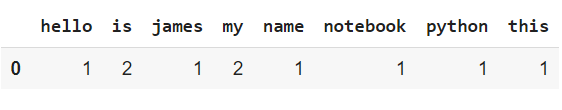

We have 8 unique words in the text and hence 8 different columns each representing a unique word in the matrix. The row represents the word count. Since the words ‘is’ and ‘my’ were repeated twice we have the count for those particular words as 2 and 1 for the rest.

Countvectorizer makes it easy for text data to be used directly in machine learning and deep learning models such as text classification.

Let’s take another example, but this time with more than 1 input:

In [14]:
text = ['Hello my name is james',
'james this is my python notebook',
'james trying to create a big dataset',
'james of words to try differnt',
'features of count vectorizer']
coun_vect = CountVectorizer(stop_words= ['is','to','my'])
count_matrix = coun_vect.fit_transform(text)
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
print(df)

   big  count  create  dataset  differnt  features  hello  james  name  \
0    0      0       0        0         0         0      1      1     1   
1    0      0       0        0         0         0      0      1     0   
2    1      0       1        1         0         0      0      1     0   
3    0      0       0        0         1         0      0      1     0   
4    0      1       0        0         0         1      0      0     0   

   notebook  of  python  this  try  trying  vectorizer  words  
0         0   0       0     0    0       0           0      0  
1         1   0       1     1    0       0           0      0  
2         0   0       0     0    0       1           0      0  
3         0   1       0     0    1       0           0      1  
4         0   1       0     0    0       0           1      0  


The words ‘is’, ‘to’ and ‘my’ have been removed from the sparse matrix

#### Now applying countvectorizer on the sentences created above

In [15]:
cv = CountVectorizer()
X = cv.fit_transform([joined_sentence, sentence1, sentence2]).toarray() # converting the array to dense matrix 
X

array([[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1]], dtype=int64)

## Loading Data Sets 

# Human 

In [16]:
human_dna = pd.read_table('humann.txt')
human_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


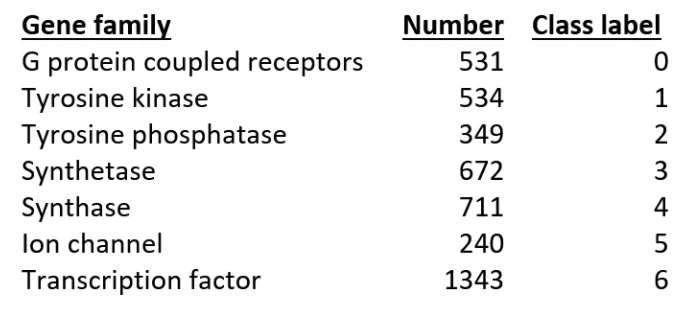

In [17]:
human_dna.shape

(4380, 2)

In [18]:
human_dna.isnull().sum() # checking for missing values 

sequence    0
class       0
dtype: int64

In [19]:
human_dna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  4380 non-null   object
 1   class     4380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


In [20]:
human_dna.describe() #descriptive statistics of numerical column 

,class
count,4380.000000
mean,3.504566
std,2.132134
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,6.000000


In [21]:
human_dna.describe(include='object') #descriptive statistics of categorical column

,sequence
count,4380
unique,3629
top,ATGGGACCAGAGGCCCTGTCATCTTTACTGCTGCTGCTCTTGGTGG...
freq,11


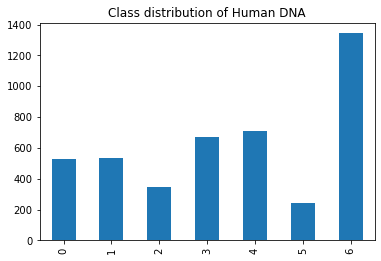

In [22]:
# bar chart 
human_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Human DNA")
plt.show()

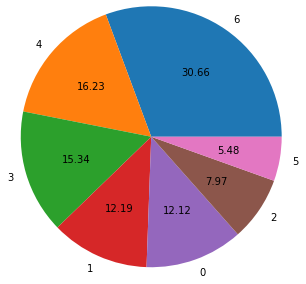

In [24]:
# pie chart 
df=human_dna['class'].value_counts()
plt.pie(df.values, labels=df.index, autopct= '%.2f', radius=1.5) 
plt.show()

# Chimpanzee

In [25]:
chimp_dna = pd.read_table('chimpanzeee.txt')
chimp_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [26]:
chimp_dna.shape

(1682, 2)

In [27]:
chimp_dna.isnull().sum() # checking for missing values 

sequence    0
class       0
dtype: int64

In [28]:
chimp_dna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  1682 non-null   object
 1   class     1682 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [29]:
chimp_dna.describe() #descriptive statistics of numerical column 

,class
count,1682.000000
mean,3.491082
std,2.177486
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,6.000000


In [30]:
chimp_dna.describe(include='object') #descriptive statistics of categorical column

,sequence
count,1682
unique,1675
top,ATGCCGAGCTGCTCCACGTCCACCATGCCGGGCATGATCTGCAAGA...
freq,2


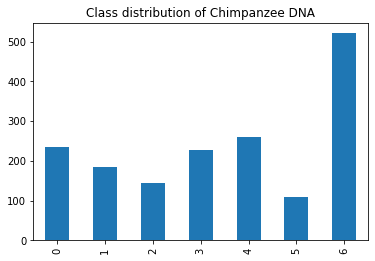

In [31]:
# bar chart 
chimp_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Chimpanzee DNA")
plt.show()

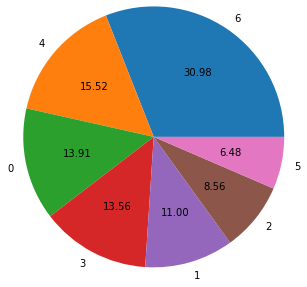

In [32]:
# pie chart 
df=chimp_dna['class'].value_counts()
plt.pie(df.values, labels=df.index, autopct= '%.2f', radius=1.5) 
plt.show()

# Dog

In [33]:
dog_dna = pd.read_table('dogg.txt')
dog_dna.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [34]:
dog_dna.shape

(820, 2)

In [35]:
dog_dna.isnull().sum() # checking for missing values 

sequence    0
class       0
dtype: int64

In [36]:
dog_dna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  820 non-null    object
 1   class     820 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.9+ KB


In [37]:
chimp_dna.describe() #descriptive statistics of numerical column 

,class
count,1682.000000
mean,3.491082
std,2.177486
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,6.000000


In [38]:
chimp_dna.describe(include='object') #descriptive statistics of categorical column

,sequence
count,1682
unique,1675
top,ATGCCGAGCTGCTCCACGTCCACCATGCCGGGCATGATCTGCAAGA...
freq,2


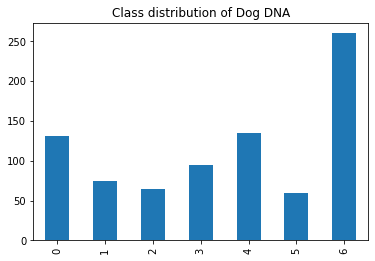

In [39]:
# bar chart 
dog_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Dog DNA")
plt.show()

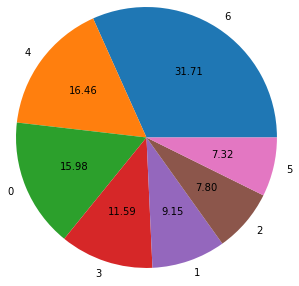

In [40]:
# pie chart 
df=dog_dna['class'].value_counts()
plt.pie(df.values, labels=df.index, autopct= '%.2f', radius=1.5) 
plt.show()

Now since machine learning or deep learning models require input to be feature matrices or numerical values and currently we still have our data in character or string format. So the next step is to encode these characters into matrices.

**Objective**: Build a classification model that is trained on the human DNA sequence and can predict a gene family based on the DNA sequence of the coding sequence. To test the model, we will use the DNA sequence of humans, dogs, and chimpanzees and compare the accuracies.

Gene families are groups of related genes that share a common ancestor. Members of gene families may be paralogs or orthologs. Gene paralogs are genes with similar sequences from within the same species while gene orthologs are genes with similar sequences in different species.

The dataset contains human DNA sequence, Dog DNA sequence, and Chimpanzee DNA sequence

## Natural language processing (NLP):

Natural language processing (NLP) refers to the branch of computer science—and more specifically, the branch of artificial intelligence or AI—concerned with giving computers the ability to understand text and spoken words in much the same way human beings can

### DNA sequence as a “language”, known as k-mer counting

A hurdle that still remains is that none of these above methods results in vectors of uniform length, and that is a necessity for feeding data to a classification or regression algorithm. So with the above methods, you have to resort to things like truncating sequences or padding with “n” or “0” to get vectors of uniform length.

DNA and protein sequences can be seen as the language of life. The language encodes instructions as well as functions for the molecules that are found in all life forms. The sequence language resemblance continues with the genome as the book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides are words, and nucleotide bases and amino acids are the alphabets. Since the relationship seems so likely, it stands to reason that the natural language processing(NLP) should also implement the natural language of DNA and protein sequences.

The method we use here is manageable and easy. We first take the long biological sequence and break it down into k-mer length overlapping “words”. For example, if we use “words” of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.

In genomics, we refer to these types of manipulations as “k-mer counting”, or counting the occurrences of each possible k-mer sequence and Python natural language processing tools make it super easy.

Now we have all our data loaded, the next step is to convert a sequence of characters into k-mer words, default size = 6 (hexamers). The function Kmers_funct() will collect all possible overlapping k-mers of a specified length from any sequence string.

In [41]:
human_dna.columns

Index(['sequence', 'class'], dtype='object')

In [42]:
chimp_dna.columns

Index(['sequence', 'class'], dtype='object')

In [43]:
dog_dna.columns

Index(['sequence', 'class'], dtype='object')

In [41]:
#apply kmers function to all datasets & join all words to list 
#then add words column & drop sequence column
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [42]:
#convert our training data sequences into short overlapping k-mers of length 6. 
#Lets do that for each species of data we have using our Kmers_funct function.

human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)

chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)

dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)


In [43]:
human_dna.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [44]:
chimp_dna.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


In [45]:
dog_dna.head()

,class,words
0,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."


We need to now convert the lists of k-mers for each gene into string sentences of words that can be used to create the Bag of Words model. We will make a target variable y to hold the class labels.

In [46]:
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_dna.iloc[:, 0].values # y_human for human_dna

In [47]:
# Now let's do the same for chimp and dog:
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
#separate labels
y_chim = chimp_dna.iloc[:, 0].values # y_chim for chimp_dna

dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
#separate labels
y_dog = dog_dna.iloc[:, 0].values  # y_dog for dog_dna

So the target variable contains an array of class values.

## CountVectorizer(): 

Creating the Bag of Words model using CountVectorizer(). This is equivalent to k-mer counting.

Convert our k-mer words into uniform length numerical vectors that represent counts for every k-mer in the vocabulary:

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [49]:
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


So, for humans we have 4380 genes converted into uniform length feature vectors of 4-gram k-mer (length 6) counts. For chimp and dog, we have the same number of features with 1682 and 820 genes respectively.

So now that we know how to transform our DNA sequences into uniform length numerical vectors in the form of k-mer counts and ngrams, we can now go ahead and build a classification model that can predict the DNA sequence function based only on the sequence itself.

Here we will use the human data to train the model, holding out 20% of the human data to test the model. Then we can challenge the model’s generalizability by trying to predict sequence function in other species (the chimpanzee and dog).

Next, train/test split human dataset and build the models.

In [50]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_human, 
                                                    test_size = 0.20, 
                                                    random_state=10)

## Model Building:

In [51]:
#Importing the libraries for model building and also the performance metices:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_score,recall_score,f1_score

### Creating a score card 

In [54]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name',  'Human_Test_F1Score', 'Chimpanzee_Test_F1Score',
                                   'Dog_Test_F1Score',  'Human_Test_accuracy', 
                                   'Chimpanzee_Test_accuracy','Dog_Test_accuracy'])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name, 
                        'Human_Test_F1Score': get_f1_score(y_test,y_pred),
                        'Chimpanzee_Test_F1Score':get_chimpf1(y_chim,y_pred_chimp),
                        'Dog_Test_F1Score':get_dogf1(y_dog,y_pred_dog),
                        'Human_Test_accuracy':get_accuracy(y_test, y_pred),
                        'Chimpanzee_Test_accuracy':get_chimpaccuracy(y_chim, y_pred_chimp),
                        'Dog_Test_accuracy':get_dogaccuracy(y_dog, y_pred_dog)}, 
                                    ignore_index = True)

In [55]:
def get_f1_score(y_test, y_pred):
    f1 = f1_score(y_test, y_pred, average='weighted')
    return f1

In [56]:
def get_accuracy(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [57]:
def get_chimpf1(y_chim, y_pred_chimp):
    f1 = f1_score(y_chim, y_pred_chimp, average='weighted')
    return f1

In [58]:
def get_chimpaccuracy(y_chim, y_pred_chimp):
    accuracy = accuracy_score(y_chim,y_pred_chimp)
    return accuracy

In [59]:
def get_dogf1(y_dog, y_pred_dog):
    f1 = f1_score(y_dog, y_pred_dog, average='weighted')
    return f1

In [60]:
def get_dogaccuracy(y_dog, y_pred_dog):
    accuracy = accuracy_score(y_dog, y_pred_dog)
    return accuracy

### Model 01: K-Nearest Neighbor (KNN) Algorithm.

In [61]:
KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
y_pred = KNNclassifier.predict(X_test)

**Confusion matrix for Human datset**:

In [63]:
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

Predicted   0    1   2    3   4   5    6
Actual                                  
0          79    5   0    0   0   0   15
1           0  108   0    0   0   0   15
2          10    2  54    0   0   0    6
3           0    9   0  103   0   0   15
4          21    9   0    0  94   0   32
5           2    2   0    0   0  28    9
6           0    9   0    0   0   0  249


**The Classification Report of Human dataset:**

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        99
           1       0.75      0.88      0.81       123
           2       1.00      0.75      0.86        72
           3       1.00      0.81      0.90       127
           4       1.00      0.60      0.75       156
           5       1.00      0.68      0.81        41
           6       0.73      0.97      0.83       258

    accuracy                           0.82       876
   macro avg       0.88      0.78      0.82       876
weighted avg       0.85      0.82      0.82       876



In [65]:
print('The accuracy score for human test dataset using KNN:',accuracy_score(y_test,y_pred))

The accuracy score for human test dataset using KNN: 0.8162100456621004


### Now let's predict for chimpanzee and dog datasets:

In [66]:
y_pred_chimp = KNNclassifier.predict(X_chimp)

In [67]:
print('Confusion_matrix for chimpanzee dataset:')
print()
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))

Confusion_matrix for chimpanzee dataset:

Predicted    0    1    2    3    4    5    6
Actual                                      
0          220    3    0    0    0    0   11
1            0  175    0    0    0    0   10
2            4    0  134    0    0    0    6
3            0    4    0  218    0    0    6
4           25    3    0    0  208    0   25
5            5    0    0    0    0  102    2
6            0    9    0    0    0    0  512


In [68]:
print('classification of chimpanzee dataset:')
print(classification_report(y_chim,y_pred_chimp))
print('The accuracy score is:',accuracy_score(y_chim,y_pred_chimp))

classification of chimpanzee dataset:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       234
           1       0.90      0.95      0.92       185
           2       1.00      0.93      0.96       144
           3       1.00      0.96      0.98       228
           4       1.00      0.80      0.89       261
           5       1.00      0.94      0.97       109
           6       0.90      0.98      0.94       521

    accuracy                           0.93      1682
   macro avg       0.95      0.93      0.94      1682
weighted avg       0.94      0.93      0.93      1682

The accuracy score is: 0.9328180737217598


In [69]:
y_pred_dog = KNNclassifier.predict(X_dog)

In [70]:
print('Confusin_matrix for dog dataset:')
print()
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))

Confusin_matrix for dog dataset:

Predicted   0   1   2   3   4   5    6
Actual                                
0          28  33   0   0   0   0   70
1           0  31   0   0   0   0   44
2           9  12  23   0   0   0   20
3           0  19   0  17   0   0   59
4           7  31   0   0  22   0   75
5           6  12   0   0   0  21   21
6           0  39   0   0   0   0  221


In [71]:
print('classification of dog dna dataset:')
print(classification_report(y_dog,y_pred_dog))
print('The accuracy score is:',accuracy_score(y_dog,y_pred_dog))

classification of dog dna dataset:
              precision    recall  f1-score   support

           0       0.56      0.21      0.31       131
           1       0.18      0.41      0.25        75
           2       1.00      0.36      0.53        64
           3       1.00      0.18      0.30        95
           4       1.00      0.16      0.28       135
           5       1.00      0.35      0.52        60
           6       0.43      0.85      0.57       260

    accuracy                           0.44       820
   macro avg       0.74      0.36      0.39       820
weighted avg       0.67      0.44      0.41       820

The accuracy score is: 0.4426829268292683


In [72]:
update_score_card(algorithm_name = 'K Nearest Neighbor', model = KNNclassifier)

# print the dataframe
score_card

,Model_Name,Human_Test_F1Score,Chimpanzee_Test_F1Score,Dog_Test_F1Score,Human_Test_accuracy,Chimpanzee_Test_accuracy,Dog_Test_accuracy
0,K Nearest Neighbor,0.81528,0.932542,0.414455,0.81621,0.932818,0.442683


**Inference**: KNN algorithm is giving a good accuracy scores for human & chimpanzee datasets as 82% and 93% whereas for dog the accuracy score is 44% which is not that good accuracy value for prediction.
    Therefore can be observed that this model is not suitable the predictions for ortholog gene families.

Let us try implementing other models and check for accuracy scores.

## Model 02: SVC() Algorithm 

In [73]:
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [74]:
#Implementing the algorithm for human dna dataset:
y_pred1=svc.predict(X_test)

In [75]:
print('Confusion_matrix for Human dna using SVC')
print()
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred1, name='Predicted')))

Confusion_matrix for Human dna using SVC

Predicted   0   1   2   3    4   5    6
Actual                                 
0          72   0   0   0    0   0   27
1           0  95   0   0    0   0   28
2           0   0  53   0    0   0   19
3           0   0   0  91    0   0   36
4           0   0   0   0  112   0   44
5           0   0   0   0    0  27   14
6           0   0   0   0    0   0  258


In [76]:
print('Classification report of Human DNA:')
print(classification_report(y_test,y_pred1))
print('The Accuracy score :',accuracy_score(y_test,y_pred1))

Classification report of Human DNA:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        99
           1       1.00      0.77      0.87       123
           2       1.00      0.74      0.85        72
           3       1.00      0.72      0.83       127
           4       1.00      0.72      0.84       156
           5       1.00      0.66      0.79        41
           6       0.61      1.00      0.75       258

    accuracy                           0.81       876
   macro avg       0.94      0.76      0.83       876
weighted avg       0.88      0.81      0.82       876

The Accuracy score : 0.8082191780821918


### Let's predict for chimpanzee and dog datasets:

In [77]:
y_pred_chimp= svc.predict(X_chimp)

In [78]:
print('Confusion_matrix for Chimpanzee dna using SVC')
print()
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))

Confusion_matrix for Chimpanzee dna using SVC

Predicted    0    1    2    3    4    5    6
Actual                                      
0          214    0    0    0    0    0   20
1            0  177    0    0    0    0    8
2            0    0  136    0    0    0    8
3            0    0    0  210    0    0   18
4            0    0    0    0  244    0   17
5            2    0    0    0    0  103    4
6            0    0    0    0    0    0  521


In [79]:
print('classification of Chimpanzee dna dataset:')
print(classification_report(y_chim,y_pred_chimp))
print('The accuracy score is:',accuracy_score(y_chim,y_pred_chimp))

classification of Chimpanzee dna dataset:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       234
           1       1.00      0.96      0.98       185
           2       1.00      0.94      0.97       144
           3       1.00      0.92      0.96       228
           4       1.00      0.93      0.97       261
           5       1.00      0.94      0.97       109
           6       0.87      1.00      0.93       521

    accuracy                           0.95      1682
   macro avg       0.98      0.95      0.96      1682
weighted avg       0.96      0.95      0.95      1682

The accuracy score is: 0.9542211652794292


In [80]:
y_pred_dog = svc.predict(X_dog)

In [81]:
print('Confusion_matrix for DOG dna using Support Vector Classifier')
print()
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))

Confusion_matrix for DOG dna using Support Vector Classifier

Predicted   0   1  2   3   4  5    6
Actual                              
0          64   0  0   0   0  0   67
1           2  12  0   0   0  0   61
2           5   0  5   0   0  0   54
3           4   0  0  17   0  0   74
4           1   0  0   0  56  0   78
5           5   0  0   0   0  6   49
6           0   0  0   0   0  0  260


In [82]:
print('classification of dog dna dataset:')
print(classification_report(y_dog,y_pred_dog))
print('The accuracy score is:',accuracy_score(y_dog,y_pred_dog))

classification of dog dna dataset:
              precision    recall  f1-score   support

           0       0.79      0.49      0.60       131
           1       1.00      0.16      0.28        75
           2       1.00      0.08      0.14        64
           3       1.00      0.18      0.30        95
           4       1.00      0.41      0.59       135
           5       1.00      0.10      0.18        60
           6       0.40      1.00      0.58       260

    accuracy                           0.51       820
   macro avg       0.88      0.35      0.38       820
weighted avg       0.78      0.51      0.46       820

The accuracy score is: 0.5121951219512195


In [83]:
update_score_card(algorithm_name = 'Support Vector Classifier', model = svc)

# print the dataframe
score_card

,Model_Name,Human_Test_F1Score,Chimpanzee_Test_F1Score,Dog_Test_F1Score,Human_Test_accuracy,Chimpanzee_Test_accuracy,Dog_Test_accuracy
0,K Nearest Neighbor,0.81528,0.932542,0.414455,0.81621,0.932818,0.442683
1,Support Vector Classifier,0.81528,0.954896,0.460601,0.81621,0.954221,0.512195


**Inference:** SVC algorithm is giving a good accuracy scores for human & chimpanzee datasets as 80% and 95% whereas for dog the accuracy score is 51% which is not that good accuracy value for prediction. Even in this model the accuracy scores have not improved so well.

### Now just to check the accuracy scores for human DNA datasets lets try implementing DecisionClassifier, Random Forest Classifier and also MultinomialNB algorithms.

In [84]:
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

In [85]:
from sklearn.model_selection import StratifiedKFold,cross_val_score,cross_val_predict

In [86]:
print("Decision Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=7,shuffle=True,random_state=42).split(X,y_human)):
    dt =DecisionTreeClassifier()
    dt.fit(X[train_index],y_human[train_index])
    pred=dt.predict(X[val_index])
    accuracy,precision, recall, f1 = get_metrics(y_human[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f" % (accuracy, f1))

Decision Classifier :
0 Iteration : Accuracy = 0.80511     F1_Score = 0.80983
1 Iteration : Accuracy = 0.80990     F1_Score = 0.81337
2 Iteration : Accuracy = 0.84185     F1_Score = 0.84566
3 Iteration : Accuracy = 0.82588     F1_Score = 0.82919
4 Iteration : Accuracy = 0.82748     F1_Score = 0.83065
5 Iteration : Accuracy = 0.82240     F1_Score = 0.82465
6 Iteration : Accuracy = 0.80800     F1_Score = 0.81200


In [87]:
print("Naive Bayes Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=7,shuffle=True,random_state=42).split(X,y_human)):
    classifier = MultinomialNB(alpha=0.1)
    classifier.fit(X[train_index],y_human[train_index])
    pred=classifier.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y_human[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f    F1_Score = %.5f" % (accuracy, f1))

Naive Bayes Classifier :
0 Iteration : Accuracy = 0.99201    F1_Score = 0.99202
1 Iteration : Accuracy = 0.98243    F1_Score = 0.98244
2 Iteration : Accuracy = 0.97923    F1_Score = 0.97928
3 Iteration : Accuracy = 0.96965    F1_Score = 0.96966
4 Iteration : Accuracy = 0.98083    F1_Score = 0.98079
5 Iteration : Accuracy = 0.99040    F1_Score = 0.99039
6 Iteration : Accuracy = 0.97920    F1_Score = 0.97922


In [88]:
print("Random Forest Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=7,shuffle=True,random_state=42).split(X,y_human)):
    rf = RandomForestClassifier(n_jobs=-1)
    rf.fit(X[train_index],y_human[train_index])
    pred=rf.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y_human[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f" % (accuracy, f1))

Random Forest Classifier :
0 Iteration : Accuracy = 0.91054     F1_Score = 0.91216
1 Iteration : Accuracy = 0.92332     F1_Score = 0.92354
2 Iteration : Accuracy = 0.92332     F1_Score = 0.92375
3 Iteration : Accuracy = 0.90096     F1_Score = 0.90427
4 Iteration : Accuracy = 0.92013     F1_Score = 0.92174
5 Iteration : Accuracy = 0.91200     F1_Score = 0.91254
6 Iteration : Accuracy = 0.91520     F1_Score = 0.91664


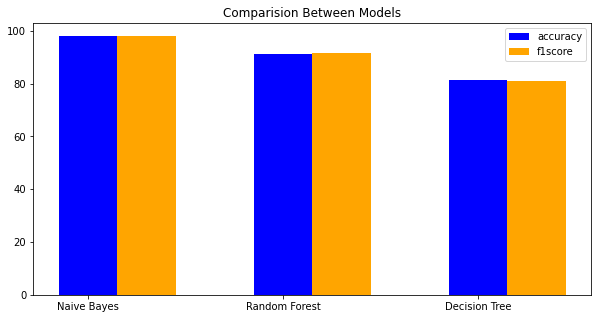

In [93]:
#scores ={"Naive Bayes":98.059  ,"Random Forest":91.4 ,"Decision Tree": 81.5}
plt.figure(figsize=(10,5))
scores=["Naive Bayes","Random Forest","Decision Tree"]
accscore=[98.059,91.4,81.5]
f1score=[98.061,91.5,81.1]
w=0.3
bar1=np.arange(len(scores))
bar2=[i+w for i in bar1]

plt.bar(bar1,accscore,w,label="accuracy",color='blue')
plt.bar(bar2,f1score,w,label="f1score",color='orange')
plt.xticks(bar1, scores)
plt.legend()
plt.title("Comparision Between Models")
plt.show()

**Inference**: From the above graph it can be observed that implementation of Naive_Bayes algorithm can give good accuracy score for the datasets which is above 95%.

## Model 3 : MultiNomialNaiveBayes 

In [134]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [135]:
y_pred = classifier.predict(X_test)

Now let's make predictions on the human hold out test set and see how it performes on unseen data.

In [136]:
print('Confusion_matrix for Human dna using SVC')
print()
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

Confusion_matrix for Human dna using SVC

Predicted   0    1   2    3    4   5    6
Actual                                   
0          94    0   0    0    1   0    4
1           0  122   0    0    0   0    1
2           0    0  71    0    0   0    1
3           0    0   0  123    3   0    1
4           2    0   0    0  148   0    6
5           0    0   0    0    0  39    2
6           0    0   0    0    0   0  258


In [138]:
print('Classification report of Human DNA:')
print(classification_report(y_test,y_pred))
print('The Accuracy score :',accuracy_score(y_test,y_pred))

Classification report of Human DNA:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        99
           1       1.00      0.99      1.00       123
           2       1.00      0.99      0.99        72
           3       1.00      0.97      0.98       127
           4       0.97      0.95      0.96       156
           5       1.00      0.95      0.97        41
           6       0.95      1.00      0.97       258

    accuracy                           0.98       876
   macro avg       0.99      0.97      0.98       876
weighted avg       0.98      0.98      0.98       876

The Accuracy score : 0.976027397260274


### Let's predict for chimpanzee and dog datasets:

In [139]:
y_pred_chimp= classifier.predict(X_chimp)

In [140]:
print('Confusion_matrix for Chimpanzee dna using SVC')
print()
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))

Confusion_matrix for Chimpanzee dna using SVC

Predicted    0    1    2    3    4    5    6
Actual                                      
0          228    0    0    0    1    0    5
1            0  184    0    0    0    0    1
2            0    0  142    0    0    0    2
3            0    0    0  224    2    0    2
4            1    0    0    0  257    0    3
5            0    0    0    0    0  108    1
6            0    0    0    0    1    0  520


In [141]:
print('classification of Chimpanzee dna dataset:')
print(classification_report(y_chim,y_pred_chimp))
print('The accuracy score is:',accuracy_score(y_chim,y_pred_chimp))

classification of Chimpanzee dna dataset:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       234
           1       1.00      0.99      1.00       185
           2       1.00      0.99      0.99       144
           3       1.00      0.98      0.99       228
           4       0.98      0.98      0.98       261
           5       1.00      0.99      1.00       109
           6       0.97      1.00      0.99       521

    accuracy                           0.99      1682
   macro avg       0.99      0.99      0.99      1682
weighted avg       0.99      0.99      0.99      1682

The accuracy score is: 0.9887039239001189


In [142]:
y_pred_dog = classifier.predict(X_dog)

In [143]:
print('Confusion_matrix for DOG dna using Support Vector Classifier')
print()
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))

Confusion_matrix for DOG dna using Support Vector Classifier

Predicted    0   1   2   3    4   5    6
Actual                                  
0          124   0   0   0    1   0    6
1            0  65   0   0    0   0   10
2            0   0  49   0    1   0   14
3            2   0   0  80    2   0   11
4            5   0   0   1  125   0    4
5            4   0   0   0    2  50    4
6            0   0   0   0    0   0  260


In [144]:
print('classification of dog dna dataset:')
print(classification_report(y_dog,y_pred_dog))
print('The accuracy score is:',accuracy_score(y_dog,y_pred_dog))

classification of dog dna dataset:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       131
           1       1.00      0.87      0.93        75
           2       1.00      0.77      0.87        64
           3       0.99      0.84      0.91        95
           4       0.95      0.93      0.94       135
           5       1.00      0.83      0.91        60
           6       0.84      1.00      0.91       260

    accuracy                           0.92       820
   macro avg       0.96      0.88      0.91       820
weighted avg       0.93      0.92      0.92       820

The accuracy score is: 0.9182926829268293


In [157]:
score_card.reset_index(drop=True)

,Model_Name,Human_Test_F1Score,Chimpanzee_Test_F1Score,Dog_Test_F1Score,Human_Test_accuracy,Chimpanzee_Test_accuracy,Dog_Test_accuracy
0,K Nearest Neighbor,0.815280,0.932542,0.414455,0.816210,0.932818,0.442683
1,Support Vector Classifier,0.815280,0.954896,0.460601,0.816210,0.954221,0.512195
2,MultiNomialNaiveBayes,0.976047,0.988720,0.917904,0.976027,0.988704,0.918293


## Random Forest Classifier 

In [158]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 42)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

In [159]:
y_pred = rf_model.predict(X_test)

Now let's make predictions on the human hold out test set and see how it performes on unseen data.

In [160]:
print('Confusion_matrix for Human dna using SVC')
print()
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

Confusion_matrix for Human dna using SVC

Predicted   0    1   2    3    4   5    6
Actual                                   
0          88    1   0    4    1   0    5
1           8  107   0    4    1   0    3
2           2    0  67    0    0   0    3
3           7    2   0  113    2   0    3
4          16    0   0    9  126   0    5
5           2    0   1    4    0  32    2
6           9    0   0    6    0   0  243


In [161]:
print('Classification report of Human DNA:')
print(classification_report(y_test,y_pred))
print('The Accuracy score :',accuracy_score(y_test,y_pred))

Classification report of Human DNA:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76        99
           1       0.97      0.87      0.92       123
           2       0.99      0.93      0.96        72
           3       0.81      0.89      0.85       127
           4       0.97      0.81      0.88       156
           5       1.00      0.78      0.88        41
           6       0.92      0.94      0.93       258

    accuracy                           0.89       876
   macro avg       0.90      0.87      0.88       876
weighted avg       0.90      0.89      0.89       876

The Accuracy score : 0.8858447488584474


### Let's predict for chimpanzee and dog datasets:

In [162]:
y_pred_chimp= rf_model.predict(X_chimp)

In [163]:
print('Confusion_matrix for Chimpanzee dna using SVC')
print()
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))

Confusion_matrix for Chimpanzee dna using SVC

Predicted    0    1    2    3    4    5    6
Actual                                      
0          225    1    0    3    0    0    5
1            0  182    0    3    0    0    0
2            0    0  144    0    0    0    0
3            2    3    0  220    2    0    1
4            3    0    0    8  247    0    3
5            2    0    0    2    0  104    1
6            2    1    0    4    3    0  511


In [164]:
print('classification of Chimpanzee dna dataset:')
print(classification_report(y_chim,y_pred_chimp))
print('The accuracy score is:',accuracy_score(y_chim,y_pred_chimp))

classification of Chimpanzee dna dataset:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       234
           1       0.97      0.98      0.98       185
           2       1.00      1.00      1.00       144
           3       0.92      0.96      0.94       228
           4       0.98      0.95      0.96       261
           5       1.00      0.95      0.98       109
           6       0.98      0.98      0.98       521

    accuracy                           0.97      1682
   macro avg       0.97      0.97      0.97      1682
weighted avg       0.97      0.97      0.97      1682

The accuracy score is: 0.9708680142687277


In [165]:
y_pred_dog = rf_model.predict(X_dog)

In [166]:
print('Confusion_matrix for DOG dna using Support Vector Classifier')
print()
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))

Confusion_matrix for DOG dna using Support Vector Classifier

Predicted   0   1   2   3   4   5    6
Actual                                
0          73  13   3  20   7   0   15
1           5  51   1   4   6   0    8
2           7   5  47   1   1   0    3
3           8  10   3  54   8   1   11
4          17   5   1  19  68   0   25
5           9   7   1   5   6  24    8
6          16   4   5   7   6   0  222


In [167]:
print('classification of dog dna dataset:')
print(classification_report(y_dog,y_pred_dog))
print('The accuracy score is:',accuracy_score(y_dog,y_pred_dog))

classification of dog dna dataset:
              precision    recall  f1-score   support

           0       0.54      0.56      0.55       131
           1       0.54      0.68      0.60        75
           2       0.77      0.73      0.75        64
           3       0.49      0.57      0.53        95
           4       0.67      0.50      0.57       135
           5       0.96      0.40      0.56        60
           6       0.76      0.85      0.80       260

    accuracy                           0.66       820
   macro avg       0.68      0.61      0.62       820
weighted avg       0.67      0.66      0.65       820

The accuracy score is: 0.6573170731707317


In [157]:
score_card.reset_index(drop=True)

,Model_Name,Human_Test_F1Score,Chimpanzee_Test_F1Score,Dog_Test_F1Score,Human_Test_accuracy,Chimpanzee_Test_accuracy,Dog_Test_accuracy
0,K Nearest Neighbor,0.815280,0.932542,0.414455,0.816210,0.932818,0.442683
1,Support Vector Classifier,0.815280,0.954896,0.460601,0.816210,0.954221,0.512195
2,MultiNomialNaiveBayes,0.976047,0.988720,0.917904,0.976027,0.988704,0.918293


In [168]:
update_score_card(algorithm_name = 'Random Forest Classifier', model = rf_model)

# print the dataframe
score_card

,Model_Name,Human_Test_F1Score,Chimpanzee_Test_F1Score,Dog_Test_F1Score,Human_Test_accuracy,Chimpanzee_Test_accuracy,Dog_Test_accuracy
0,K Nearest Neighbor,0.815280,0.932542,0.414455,0.816210,0.932818,0.442683
1,Support Vector Classifier,0.815280,0.954896,0.460601,0.816210,0.954221,0.512195
2,MultiNomialNaiveBayes,0.976047,0.988720,0.917904,0.976027,0.988704,0.918293
3,Random Forest Classifier,0.888605,0.970960,0.653122,0.885845,0.970868,0.657317


##### Till now we can see that we have pretty conflicting results from various models used above 